<a href="https://colab.research.google.com/github/yoonju977/CV_hufs_25-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [30]:
img_path = '/content/drive/MyDrive/IMG_1172.jpeg'
img = cv.imread(img_path)
img = cv.resize(img, (800, 800))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

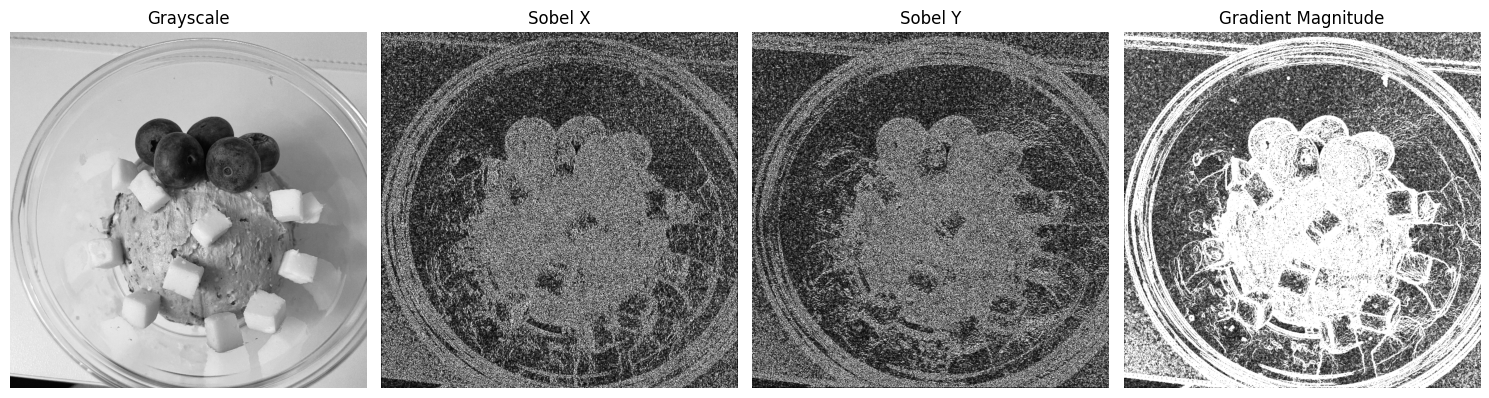

In [31]:
# 수평(x) 방향 Sobel
sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)
abs_sobel_x = np.absolute(sobel_x)
sobel_x_8u = np.uint8(abs_sobel_x)

# 수직(y) 방향 Sobel
sobel_y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=5)
abs_sobel_y = np.absolute(sobel_y)
sobel_y_8u = np.uint8(abs_sobel_y)

# Gradient Magnitude 계산
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude = np.uint8(np.clip(magnitude, 0, 255))

# 결과 시각화
plt.figure(figsize=(15,5))
plt.subplot(1,4,1), plt.imshow(gray, cmap='gray'), plt.title('Grayscale'), plt.axis('off')
plt.subplot(1,4,2), plt.imshow(sobel_x_8u, cmap='gray'), plt.title('Sobel X'), plt.axis('off')
plt.subplot(1,4,3), plt.imshow(sobel_y_8u, cmap='gray'), plt.title('Sobel Y'), plt.axis('off')
plt.subplot(1,4,4), plt.imshow(magnitude, cmap='gray'), plt.title('Gradient Magnitude'), plt.axis('off')
plt.tight_layout()
plt.show()

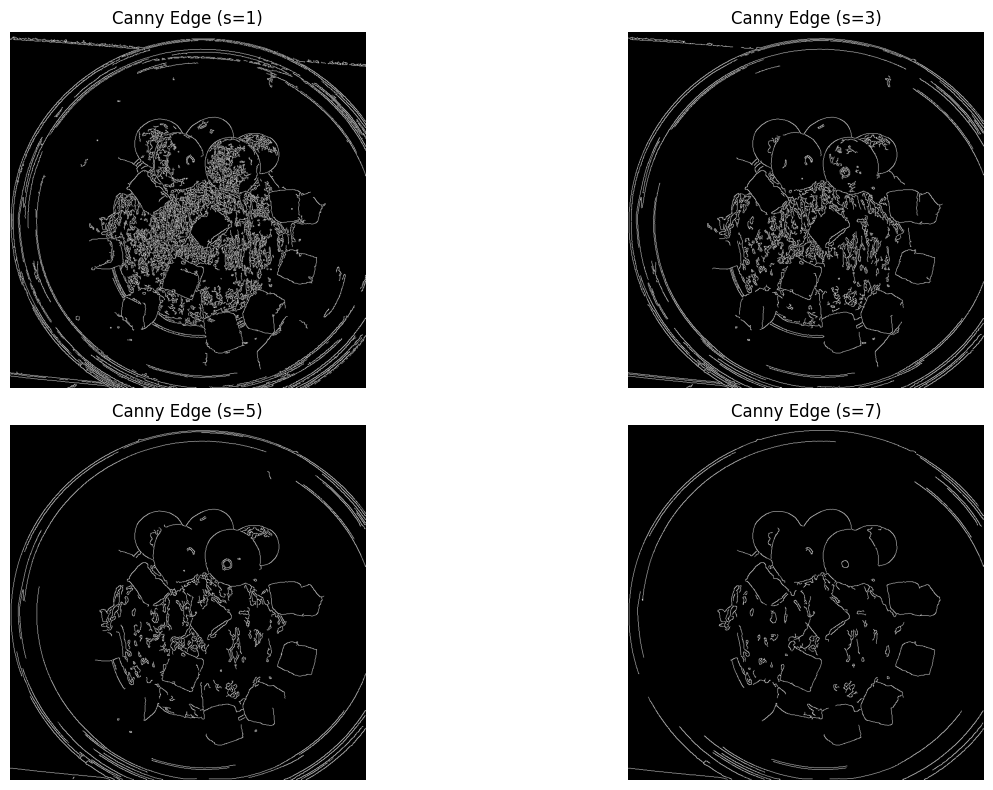

In [32]:
s_values = [1, 3, 5, 7]
edges_list = []

for s in s_values:
    # Gaussian Blur
    blurred = cv.GaussianBlur(gray, (s, s), 0)

    # Canny Edge Detection
    edges = cv.Canny(blurred, threshold1=50, threshold2=150, apertureSize=3)
    edges_list.append(edges)


plt.figure(figsize=(15, 8))
for i, (s, edge_img) in enumerate(zip(s_values, edges_list)):
    plt.subplot(2, 2, i+1)
    plt.imshow(edge_img, cmap='gray')
    plt.title(f'Canny Edge (s={s})')
    plt.axis('off')

plt.tight_layout()
plt.show()

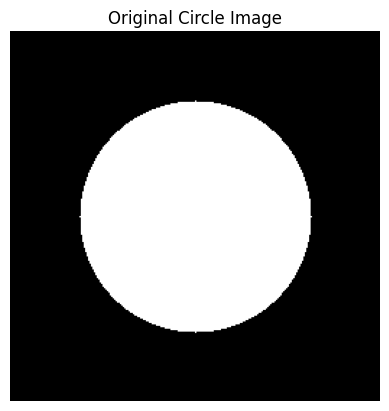

In [33]:
# 원형 이미지
img_size = 256
center = (128, 128)
radius = 80

img = np.full((img_size, img_size), 50, dtype=np.uint8)
cv.circle(img, center, radius, 200, -1)

plt.imshow(img, cmap='gray')
plt.title("Original Circle Image")
plt.axis('off')
plt.show()

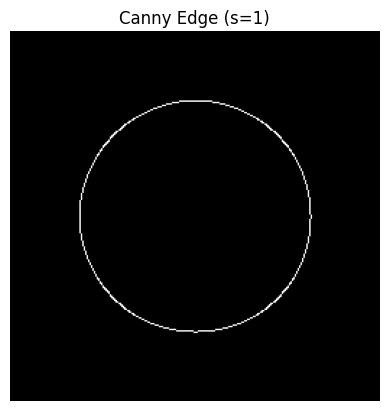

In [34]:
# Gaussian blur 적용 후 Canny edge
blurred = cv.GaussianBlur(img, (1, 1), 0)
edges = cv.Canny(blurred, 50, 150, apertureSize=3)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge (s=1)")
plt.axis('off')
plt.show()

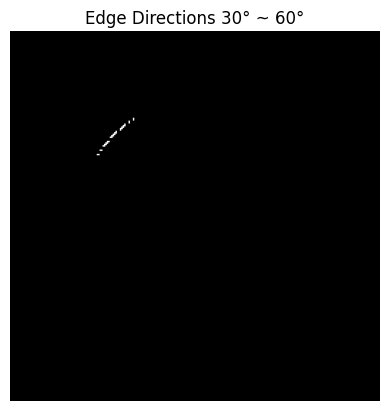

In [35]:
# Sobel을 이용한 Gradient 방향 계산
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# 방향 각도 계산 (라디안 → 도)
angles = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
angles = (angles + 360) % 360


selected_edges = np.zeros_like(edges)
selected_edges[(edges > 0) & (angles >= 30) & (angles <= 60)] = 255

plt.imshow(selected_edges, cmap='gray')
plt.title("Edge Directions 30° ~ 60°")
plt.axis('off')
plt.show()